In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [2]:
# Load the Fashion MNIST dataset

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

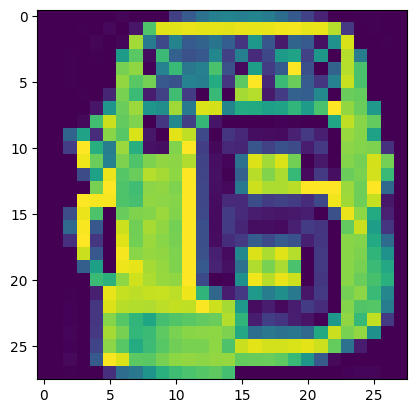

In [17]:
plt.imshow(X_train[6000])

In [6]:
pd.Series(y_train).nunique()

10

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
#converting data into right type

X_train = X_train /255
X_test = X_test /255.0


In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
# without augmentation
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
          strides=(1,1),
          activation='relu',
          input_shape=(28,28,1)))

model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten ())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))




In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=2)

Epoch 1/2
469/469 [==============================] - 15s 5ms/step - loss: 0.4326 - accuracy: 0.8460
Epoch 2/2
469/469 [==============================] - 2s 5ms/step - loss: 0.2934 - accuracy: 0.8932
